In [34]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten

In [28]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [29]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [30]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [31]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [35]:
model = Sequential([Conv2D(32,(3,3),strides = (1,1), padding='same',activation = 'relu'),
                   MaxPooling2D(),
                   Conv2D(64,(3,3),strides = (1,1), padding='same',activation = 'relu'),
                   MaxPooling2D(),
                   Conv2D(64,(3,3),strides = (1,1),padding='same', activation = 'relu'),
                   Flatten(),
                   Dense(64,activation='relu'),
                   Dense(10,activation='softmax')])

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(x_train,y_train,batch_size=32, epochs=5,validation_data=[x_test,y_test])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 30ms/step - accuracy: 0.9108 - loss: 0.2831 - val_accuracy: 0.9870 - val_loss: 0.0418
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9873 - loss: 0.0403 - val_accuracy: 0.9895 - val_loss: 0.0300
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9912 - loss: 0.0272 - val_accuracy: 0.9879 - val_loss: 0.0392
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.9932 - loss: 0.0208 - val_accuracy: 0.9904 - val_loss: 0.0308
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9949 - loss: 0.0152 - val_accuracy: 0.9913 - val_loss: 0.0299


In [41]:
import matplotlib.pyplot as plt
import numpy as np
def predict(index):
    img = x_test[index]
    plt.title('Original Image')
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.show()
    img = np.expand_dims(img,axis=0)
    predict = model.predict(img)
    predict_class = np.argmax(predict)
    return predict_class
    

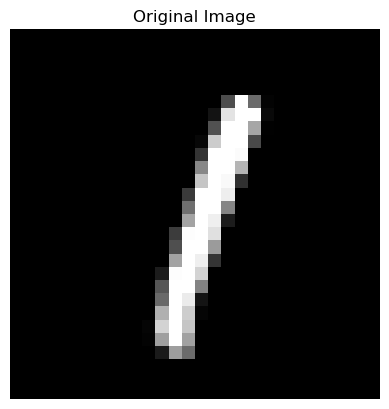

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Prediciton:  1


In [42]:
result = predict(5)
print('Prediciton: ',result)